In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def show(img):
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [3]:
def midline(img,r):
    pointlist=[]
    img=cv2.blur(img,(5,5))
    for i in range(img.shape[0]-1,0,-r) :
        s=0
        n=0
        for j in range(img.shape[1]) :        
            if img[i][j]!=0:
                s+=j
                n+=1
        if n==0 :
            return img
        pointlist.append((round(s/n),i))
    temp=np.copy(img)
    for i in range(len(pointlist)-1):
        midline=cv2.line(temp,pointlist[i],pointlist[i+1],(255),3)
    return midline

In [49]:
def correct_perspective(img):
    size=(img.shape[1],img.shape[0])
    pts=np.float32([[350,1250],[1300,1250],
                    [100,1500],[1490,1500]])
    dst=np.float32([[100,1000],[1490,1000],
                    [100,1500],[1490,1500]])
    mat=cv2.getPerspectiveTransform(pts,dst)
    tr_img=cv2.warpPerspective(img,mat,size)
    return tr_img

In [50]:
def revert_perspective(img):
    size=(img.shape[1],img.shape[0])
    pts=np.float32([[350,1250],[1300,1250],
                    [100,1500],[1490,1500]])
    dst=np.float32([[100,1000],[1490,1000],
                    [100,1500],[1490,1500]])
    mat=cv2.getPerspectiveTransform(dst,pts)
    tr_img=cv2.warpPerspective(img,mat,size)
    return tr_img

In [46]:
def find_lines(img) :
    edges=cv2.Canny(mask,10,100)
    points=cv2.HoughLinesP(edges,1,np.pi/100,7)
    temp=np.zeros(np.shape(mask))
    linesmat=np.copy(temp)
    for i in points :
        p1=np.array([i[0][0],i[0][1]])
        p2=np.array([i[0][2],i[0][3]])
        #print(type(p1),p2)
        v=np.subtract(p2,p1)
        #print(v)
        theta=np.arccos(np.dot(v,(1,0))/((v[0]**2+v[1]**2)**0.5))
        o=[round((p2[1]+p1[1])/2),round((p1[0]+p2[0])/2)]
        linesmat[o[0],o[1]]=theta
        hough=np.uint8(cv2.line(temp,p1,p2,(255),2))
    linesmat=linesmat.astype("float32")
    return hough,linesmat

In [5]:
img=cv2.cvtColor(cv2.imread("yol.jpg"),cv2.COLOR_BGR2RGB)

In [6]:
img=correct_perspective(img)

In [7]:
yl=np.uint8([[[203,165,82]]])

In [8]:
cv2.cvtColor(yl,cv2.COLOR_RGB2HSV)

array([[[ 21, 152, 203]]], dtype=uint8)

In [9]:
hsv=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)

In [61]:
mask=cv2.inRange(hsv,np.array([10,50,165]),np.array([25,255,255]))

In [21]:
z=np.zeros(np.shape(mask))

In [23]:
contours, hierarchy = cv2.findContours(mask,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

In [55]:
z=cv2.drawContours(z, contours, -1, (255), 11)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


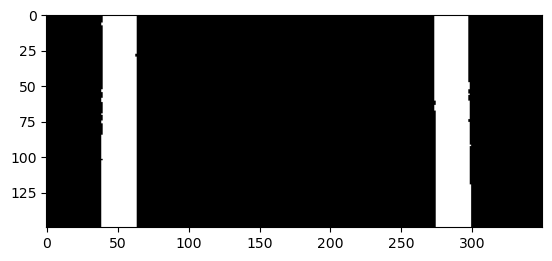

In [56]:
show(z)

In [11]:
edges=cv2.Canny(mask,10,100)

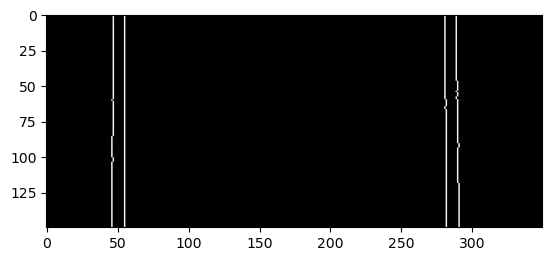

In [12]:
show(edges)

In [62]:
hough,lines=find_lines(mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


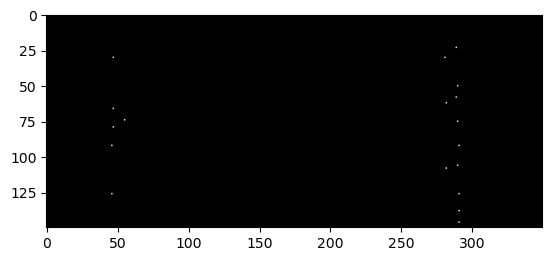

In [63]:
show(lines)

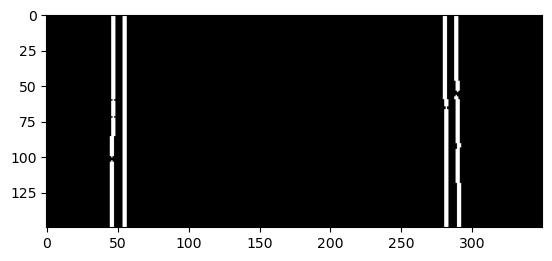

In [64]:
show(hough)

In [20]:
a=np.array([1,2])

In [ ]:
a.astype()

In [40]:
pointlist=[]
for i in range(0,mask.shape[0],10) :
    s=0
    n=0
    for j in range(mask.shape[1]) :        
        if mask[i][j]==255:
            s+=j
            n+=1
    pointlist.append((round(s/n),i))
pointlist

[(167, 0),
 (175, 10),
 (183, 20),
 (168, 30),
 (168, 40),
 (168, 50),
 (168, 60),
 (161, 70),
 (168, 80),
 (162, 90),
 (162, 100),
 (168, 110),
 (175, 120),
 (169, 130),
 (169, 140),
 (162, 150)]

In [86]:
temp=np.copy(mask)
for i in range(len(pointlist)-1):
    midline=cv2.line(temp,pointlist[i],pointlist[i+1],(255),3)

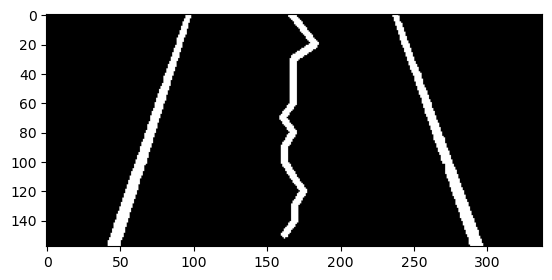

In [87]:
show(midline)

In [39]:
temp=np.copy(edges)
for i in range(len(pointlist)-1):
    midline1=cv2.line(temp,pointlist[i],pointlist[i+1],(255),3)

In [13]:
lines=cv2.HoughLinesP(edges,3,np.pi/100,5)
temp=np.copy(edges)
for i in lines :
    p1=(i[0][0],i[0][1])
    p2=(i[0][2],i[0][3])
    hough=cv2.line(temp,p1,p2,(255),2)

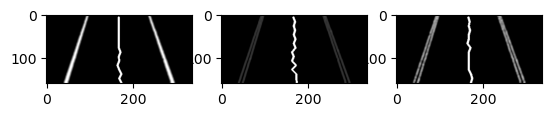

In [22]:
imgs=[mask,edges,hough]
for i in range(len(imgs)):
    plt.subplot(1,3,i+1)
    show(midline(imgs[i],10))

In [32]:
img=cv2.imread(r"C:\Users\Hp\Downloads\WhatsApp Image 2024-04-28 at 13.18.59.jpeg")

In [4]:
img.shape

(2048, 1536, 3)

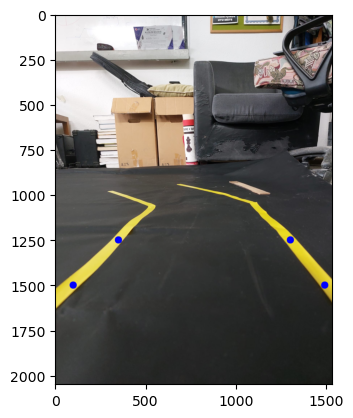

In [36]:
show(img)

In [51]:
tr_img=correct_perspective(img)

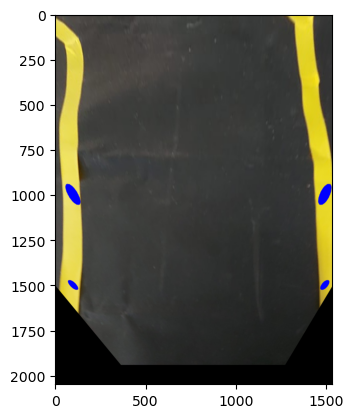

In [52]:
show(tr_img)

In [53]:
tr_img=revert_perspective(img)

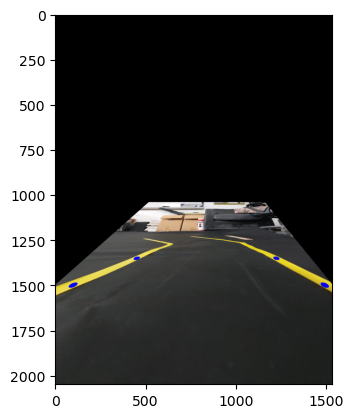

In [54]:
show(tr_img)

In [35]:
pts1=[[350,1250],[1300,1250],
      [100,1500],[1490,1500]]
for i in pts1 :
    cv2.circle(img,i,20,(255,0,0),thickness=-1)

In [37]:
#pts=np.float32([[73,70],[262,70], [50,140],[285,140]])
#dst=np.float32([[50,20],[285,20],[50,140],[285,140]])

pts=np.float32([[350,1250],[1300,1250],
                [100,1500],[1490,1500]])
dst=np.float32([[100,1000],[1490,1000],
                [100,1500],[1490,1500]])
mat=cv2.getPerspectiveTransform(pts,dst)
tr_img=cv2.warpPerspective(img,mat,(1500,2040))

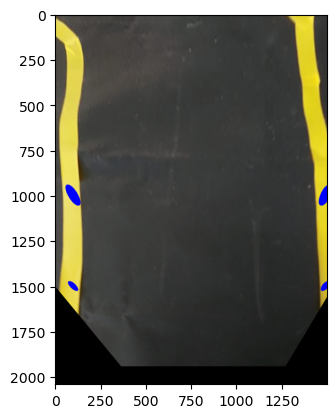

In [38]:
show(tr_img)

In [39]:
tr_img=cv2.warpPerspective(tr_img,mat,(1530,2040))

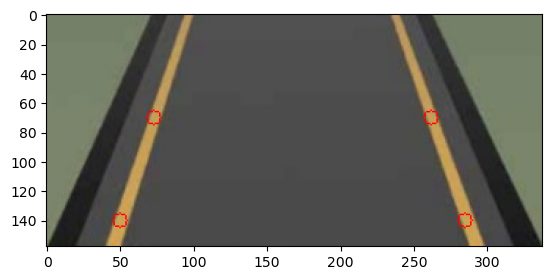

In [24]:
plt.imshow(img)